In [18]:
import pandas as pd  # for data handling
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for enhanced visualizations
from sklearn.model_selection import train_test_split  # to split the data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # for encoding and scaling
from sklearn.ensemble import RandomForestRegressor  # regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # evaluation metrics
import subprocess
import zipfile
import os

# Step 1: Download the dataset using Kaggle API
subprocess.run(["kaggle", "datasets", "download", "-d", "nehalbirla/vehicle-dataset-from-cardekho"])

# Step 2: Unzip the dataset
with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip", 'r') as zip_ref:
    zip_ref.extractall("vehicle_dataset")

# Load the dataset
url = 'vehicle_dataset/Car details v3.csv'
df = pd.read_csv(url)  # load data into a DataFrame

In [19]:
# Exploratory Data Analysis
print("First few rows of data:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

First few rows of data:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000r

In [20]:
print(df)


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [21]:
df.isna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [23]:
# Encode categorical columns
label_encoders = {}
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save encoders for future use if needed

# Add 'age' column and drop 'year'
df['age'] = 2024 - df['year']
df = df.drop('year', axis=1)

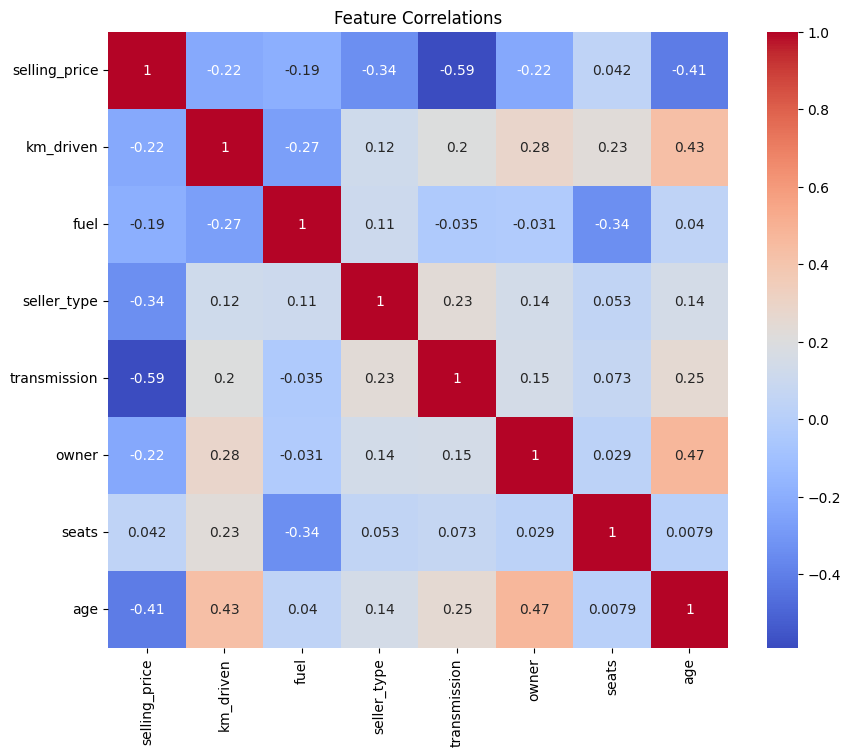

In [24]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


In [25]:
# Dropping columns that are not useful for prediction, like 'name'
df = df.drop('name', axis=1)

# Defining features and target
X = df.drop('selling_price', axis=1)  # features
y = df['selling_price']  # target

# Check for any remaining non-numeric columns and encode them if needed
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("Encoding categorical features:", non_numeric_cols)
    # Apply label encoding to non-numeric columns
    for col in non_numeric_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


scaler = StandardScaler()
X = scaler.fit_transform(X)


Encoding categorical features: Index(['mileage', 'engine', 'max_power', 'torque'], dtype='object')


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [27]:
print("\nTraining Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))

print("\nTest Set Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))



Training Set Performance:
Mean Absolute Error (MAE): 28415.758476428055
Mean Squared Error (MSE): 4978496330.216621
R2 Score: 0.992381374001714

Test Set Performance:
Mean Absolute Error (MAE): 62842.631910196425
Mean Squared Error (MSE): 12517915630.118338
R2 Score: 0.9819959428029609
